In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Nodes:
    
    """ Nodes exposure, updating and dying, edges removing. """
    
    
    def __init__(self, exposure=None, welfare=None):
        if exposure is None:
            exposure = random.uniform(-1, 1)
        self.exposure = exposure
        self.welfare = self.exposure * stock_price
        self.edges = []
        self.has_connected = False

        
    def add_edges(self, other_node):
        closest_node = min(
            [node for node in other_node if node.exposure * self.exposure < 0],
            key=lambda node: abs(node.exposure + self.exposure),
            default=None
        )
        if closest_node:
            past_exposure = self.exposure
            self.exposure = abs(closest_node.exposure + self.exposure) / 2
            closest_node.exposure = abs(closest_node.exposure + self.exposure) / 2
            
            edge1 = Edges(self, closest_node, past_exposure - self.exposure)
            self.edges.append(edge1)
            closest_node.edges.append(edge1)

            edge2 = Edges(closest_node, self, self.exposure - past_exposure)
            closest_node.edges.append(edge2)
            self.edges.append(edge2)
            
            self.has_connected = True
            closest_node.has_connected = True


    def update_exposure(self):
        self.exposure += random.uniform(-0.5, 0.5)
        self.welfare = self.exposure * stock_price

        
    def death(self):
        death_threshold = 2
        # the threshold value still need to adjust, for example, why do we set that equaling to 2?
        if self.exposure > death_threshold:
            network.remove_node(self)
        # thhe death condition need to change, so as welfare calculating
        #if self.welfare < 0:
            #network.remove_node(self)
            
            
    def remove_edges(self):
        for edge in list(self.edges):
            if edge.source == self:
                before_exposure = edge.destination.exposure
                edge.destination.exposure -= edge.weight
                edge.destination.edges.remove(edge)
                difference = before_exposure - edge.destination.exposure
                #print(before_exposure, edge.destination.exposure, difference, edge.weight)
                #print(round(difference, 5) == round(edge.weight, 5))
                        
            
    def reset_connection(self):
        self.has_connected = False
        

In [3]:
class Edges:
    
    def __init__(self, source, destination, weight):
        self.source = source
        self.destination = destination
        self.weight = weight


In [4]:
class Networks:
    
    """Network updating and simulation."""

    
    def __init__(self, n):
        self.nodes = [Nodes() for _ in range(n)]
        for node in self.nodes:
            node.add_edges(self.nodes)
        
        
    def remove_node(self, node):
        node.remove_edges()
        self.nodes.remove(node)
        
  
    def update_network(self):
        for node in list(self.nodes):
            node.reset_connection()

        for node in self.nodes:
            node.add_edges(self.nodes)
            node.update_exposure()
            node.death()
            
    def get_adjacency_matrix(self):
        size = len(self.nodes)
        matrix = np.zeros((size, size))

        for i, node in enumerate(self.nodes):
            for edge in node.edges:
                if edge.source == node:
                    j = self.nodes.index(edge.destination)
                    matrix[i, j] = edge.weight

        return matrix

            
    def simulate(self, steps):
        node_counts = []
        for _ in range(steps):
            self.update_network()
            node_counts.append(len(self.nodes))
            #adjacency = self.get_adjacency_matrix()
            
        return node_counts
            

In [5]:
# By uncommenting the two lines in Nodes.remove_edges(), we can verify the accuracy of the results.
# When a node dies, the weight of the previously established edge is added back to the node connected to it.
# We use this block for testing.

stock_price = 12

network = Networks(10)
node_counts = network.simulate(30)

print(node_counts)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9]


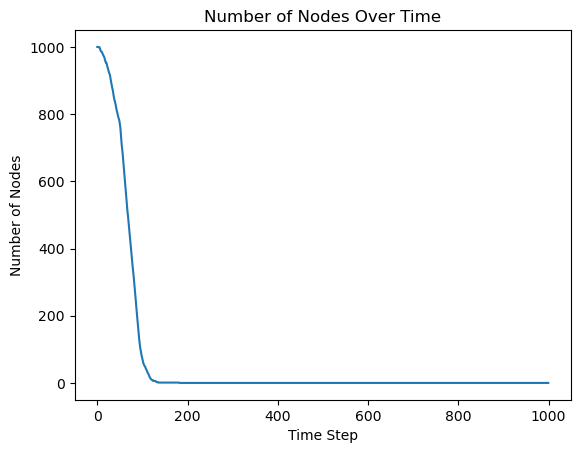

In [6]:
# a fig to test whether the code works

stock_price = 12

network = Networks(1000)
node_counts = network.simulate(1000)

plt.plot(node_counts)
plt.xlabel('Time Step')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes Over Time')
plt.show()